<IPython.core.display.Javascript object>


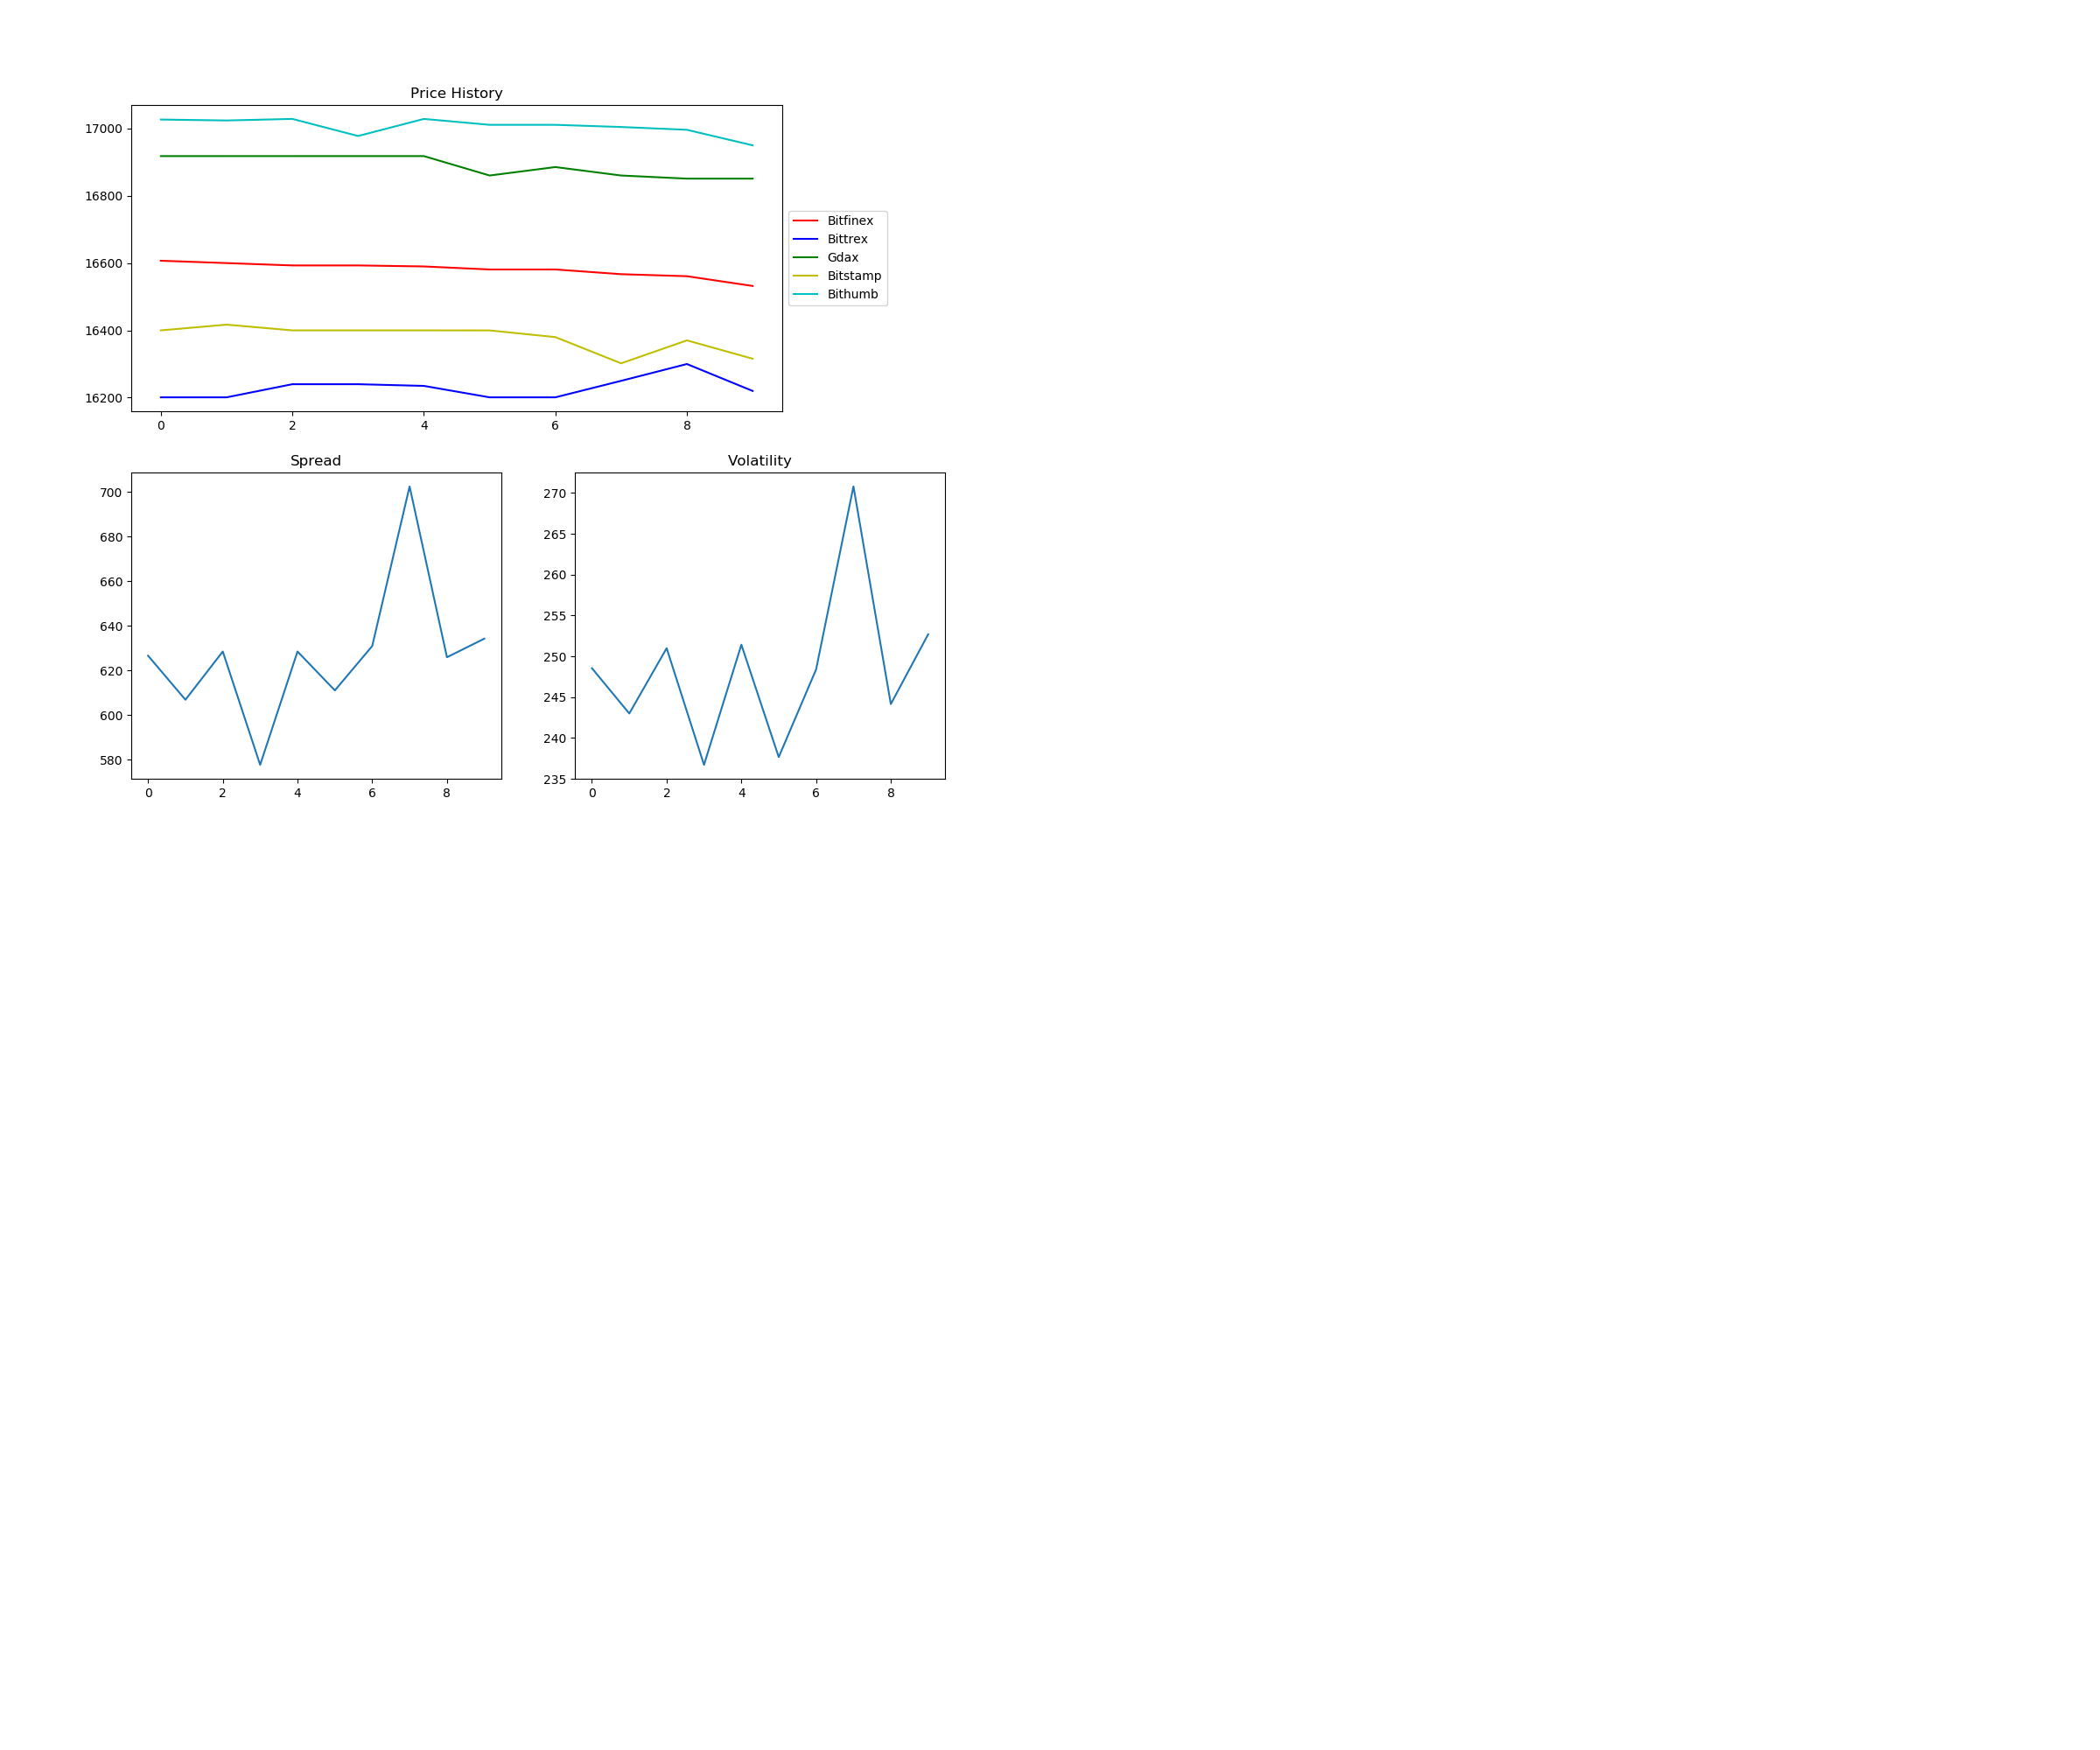

/Users/cyian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [ ]:
%matplotlib notebook
import scraper as sc
import importlib
import matplotlib.pyplot as plt
import time
import numpy as np

importlib.reload(sc)
web_scraper = sc.scraper()

y_1 = []
y_2 = []
y_3 = []
y_4 = []
y_5 = []

fig = plt.figure(figsize = (12, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.ion()

fig.show()
fig.canvas.draw()

while len(y_3) <= 10:
#     web_scraper.fetch('Bitfinex', dlist)
#     print(dlist[-1]
    ax1.clear()
    ax2.clear()
    ax3.clear()
    web_scraper.fetch('Bitfinex', y_1)
    web_scraper.fetch('Bittrex', y_2)
    web_scraper.fetch('Gdax', y_3)
    web_scraper.fetch('Bitstamp', y_4)
    web_scraper.fetch('Bithumb', y_5)
    ax1.plot(y_1, label = 'Bitfinex', color = 'r')
    ax1.plot(y_2, label = 'Bittrex', color = 'b')
    ax1.plot(y_3, label = 'Gdax', color = 'g')
    ax1.plot(y_4, label = 'Bitstamp', color = 'y')
    ax1.plot(y_5, label = 'Bithumb', color = 'c')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax1.title.set_text('Price History')
    
    max_list = np.maximum.reduce([y_1, y_3, y_4, y_5])
    min_list = np.minimum.reduce([y_1, y_3, y_4, y_5])
    result = np.subtract(max_list, min_list).tolist()
    ax2.plot(result)
    ax2.title.set_text('Spread')
    
    m = np.column_stack([y_1, y_3, y_4, y_5])
    stdlist = np.array(m.std(1).transpose()).reshape(-1,).tolist()
    ax3.plot(stdlist)
    ax3.title.set_text('Volatility')
    
    fig.canvas.draw()
    time.sleep(3)
    plt.legend()
    
 